In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix
from pandas.stats.api import ols
matplotlib.style.use('ggplot')
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms
from sklearn import linear_model
import plotly
from plotly.graph_objs import *

In [2]:
pizza_data_original = pd.read_csv('Ex06_Pizzademand_Regreesion.csv')

In [3]:
pizza_data = pizza_data_original[[np.all(values) for values in pizza_data_original.values > 0]]

In [4]:
columns = pizza_data.describe(include=['float64']).columns
for col in columns:
    pizza_data[col] = pizza_data[col].apply(lambda x :(x-pizza_data[col].mean())/pizza_data[col].std())
#     kepler_data[col] = kepler_data[col].apply(lambda x :print(x))

/home/user/ml_regression/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [5]:
train = pizza_data.ix[1:82, :]

In [6]:
test = pizza_data.ix[82:, :]

In [7]:
x_train = pizza_data.ix[1:82, :-1]
x_train.columns

Index(['PizzaPrice', 'BurgerPrice', 'RoomTemperature', 'DeliveryMode',
       'Income', 'softdrinkPrice', 'Location'],
      dtype='object')

In [8]:
y_train = pizza_data.ix[1:82, -1]

In [9]:
x_test = pizza_data.ix[82:, :-1]

In [10]:
y_test = pizza_data.ix[82:, -1]

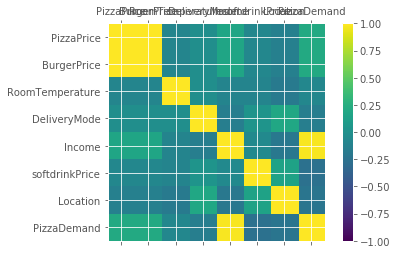

,PizzaPrice,BurgerPrice,RoomTemperature,DeliveryMode,Income,softdrinkPrice,Location,PizzaDemand
PizzaPrice,1.000000,1.000000,-0.086811,-0.012426,0.172350,-0.076276,-0.130941,0.215934
BurgerPrice,1.000000,1.000000,-0.086811,-0.012426,0.172350,-0.076276,-0.130941,0.215934
RoomTemperature,-0.086811,-0.086811,1.000000,-0.009645,-0.093795,-0.094953,-0.180548,-0.074532
DeliveryMode,-0.012426,-0.012426,-0.009645,1.000000,-0.144295,0.031975,0.193936,-0.145687
Income,0.172350,0.172350,-0.093795,-0.144295,1.000000,-0.051557,-0.198284,0.979153
softdrinkPrice,-0.076276,-0.076276,-0.094953,0.031975,-0.051557,1.000000,0.154527,-0.250431
Location,-0.130941,-0.130941,-0.180548,0.193936,-0.198284,0.154527,1.000000,-0.226107
PizzaDemand,0.215934,0.215934,-0.074532,-0.145687,0.979153,-0.250431,-0.226107,1.000000


In [11]:
correlations = pizza_data.corr()
fig = plt.figure()
names = pizza_data.columns
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
correlations

In [12]:
scatter_matrix(pizza_data, diagonal='kde', figsize=(10, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec5feb7da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fec5cb87a58>]], dtype=object)

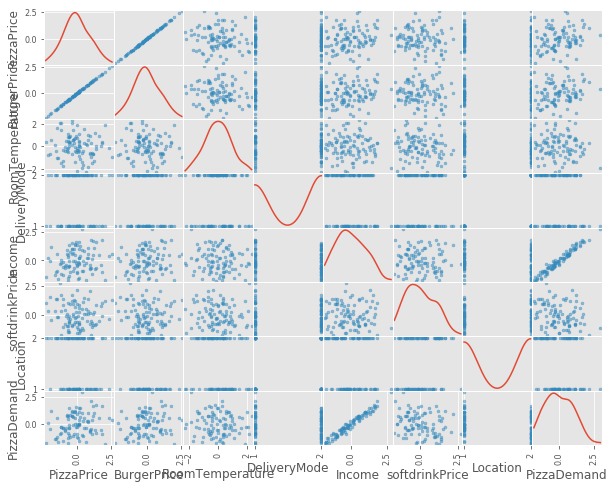

In [13]:
plt.show()

## model with all features

In [14]:
model = sm.ols(formula = 'PizzaDemand ~ PizzaPrice + BurgerPrice + RoomTemperature + DeliveryMode + Income + Location + softdrinkPrice', data=train).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PizzaDemand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.667e+05
Date:                Fri, 31 Mar 2017   Prob (F-statistic):          5.43e-175
Time:                        16:58:05   Log-Likelihood:                 336.43
No. Observations:                  80   AIC:                            -658.9
Df Residuals:                      73   BIC:                            -642.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0001      0.002     -0.058      0.954      -0.004       0.004
PizzaPrice      -3.133e+07   1.08e+11     -0.000      1.000   -2.15e+11    2.15e+11
BurgerPrice      3.133e+07   1.08e+11      0.000      1.000   -2.15e+11    2.15e+11
RoomTemperature -6.181e-07      0.000     -0.001      0.999      -0.001       0.001
DeliveryMode     4.357e-05      0.001      0.050      0.960      -0.002       0.002
Income              0.9629      0.000   2125.144      0.000       0.962       0.964
Location         2.468e-05      0.001      0.027      0.979      -0.002       0.002
softdrinkPrice     -0.1981      0.000   -472.813      0.000      -0.199      -0.197
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.339
Skew:                           0.147   Prob(JB):                        0.844
Kurtosis:                       2.877   Cond. No.                     8.82e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
predictions = model.predict(x_test)

In [17]:
mse = np.mean((predictions - y_test)**2)

In [18]:
rmse = mse**0.5

In [19]:
rmse

0.0033968462504870849

In [20]:
plt.plot(y_test, predictions)

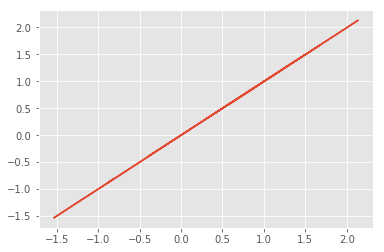

In [21]:
plt.show()

In [22]:
residuals = y_test - predictions

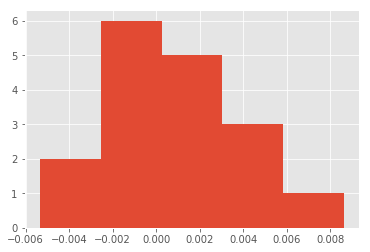

In [23]:
plt.hist(residuals, bins=5)
plt.show()

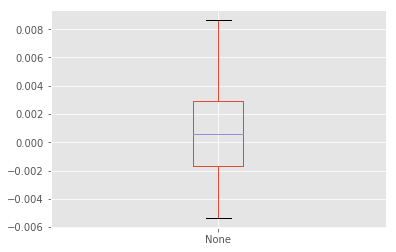

In [24]:
residuals.plot(kind='box')
plt.show()

In [25]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name, test))

[('F statistic', 1.7759263355617032), ('p-value', 0.051952981249408538)]

## model dropping room temperature

In [26]:
model_income = sm.ols(formula='PizzaDemand ~ Income + BurgerPrice + PizzaPrice + softdrinkPrice + DeliveryMode + Location', data=train).fit()

In [27]:
predictions_income = model_income.predict(x_test)

In [28]:
rmse = np.mean((predictions_income - y_test)**2)**0.5

In [29]:
rmse

0.00031704073284894249

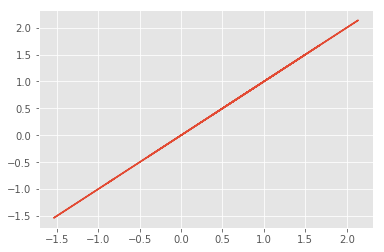

In [30]:
plt.plot(y_test, predictions_income)
plt.show()

In [31]:
residuals = y_test - predictions_income

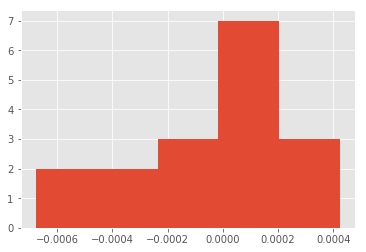

In [32]:
plt.hist(residuals, bins=5)
plt.show()

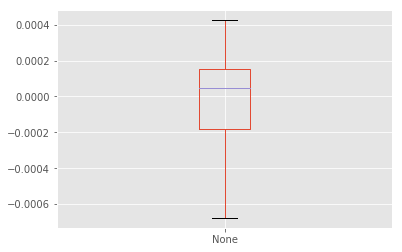

In [33]:
residuals.plot(kind='box')
plt.show()

In [34]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model_income.resid, model_income.model.exog)
list(zip(name, test))

[('F statistic', 1.7938599448762824), ('p-value', 0.046525582442739785)]

## model with few features

In [35]:
model_room = sm.ols(formula='PizzaDemand ~ Income + PizzaPrice + softdrinkPrice', data=train).fit()

In [36]:
model_room.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PizzaDemand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.337e+09
Date:                Fri, 31 Mar 2017   Prob (F-statistic):          2.49e-293
Time:                        16:58:07   Log-Likelihood:                 600.74
No. Observations:                  80   AIC:                            -1193.
Df Residuals:                      76   BIC:                            -1184.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.025e-06   1.52e-05     -0.199      0.843   -3.34e-05    2.73e-05
Income             0.9629   1.57e-05   6.13e+04      0.000       0.963       0.963
PizzaPrice         0.0349   1.54e-05   2267.747      0.000       0.035       0.035
softdrinkPrice    -0.1981   1.49e-05  -1.33e+04      0.000      -0.198      -0.198
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.308
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.181
Skew:                           0.003   Prob(JB):                        0.913
Kurtosis:                       2.767   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
predictions_room = model_room.predict(x_test)

In [38]:
np.mean((predictions_room - y_test)**2)**0.5

0.00017988790379862692

In [39]:
residuals = y_test - predictions_room

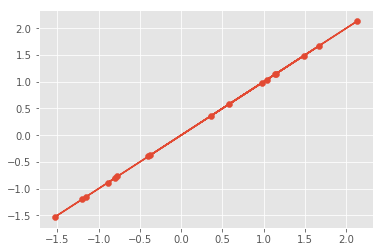

In [40]:
plt.scatter(y_test, predictions_room)
plt.plot(y_test, predictions_room)
plt.show()

In [41]:
plt.hist(residuals, bins=5)

(array([ 2.,  6.,  6.,  1.,  2.]),
 array([ -2.83561060e-04,  -1.39525674e-04,   4.50971266e-06,
          1.48545099e-04,   2.92580485e-04,   4.36615871e-04]),
 <a list of 5 Patch objects>)

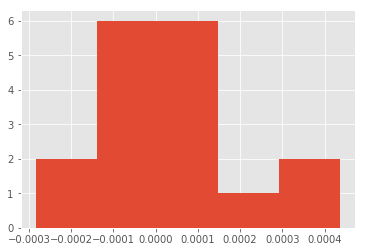

In [42]:
plt.show()

In [43]:
residuals.plot(kind='box')

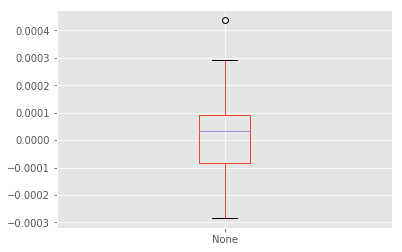

In [44]:
plt.show()

In [45]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model_room.resid, model_room.model.exog)
list(zip(name, test))

[('F statistic', 1.5194424156342867), ('p-value', 0.1071408441301195)]

## Ridge

In [46]:
alphas_ridge = np.linspace(0.001,4,100)
fdf=pd.DataFrame()
model = linear_model.Ridge()
coeff = []
for a in alphas_ridge:
    model.set_params(alpha=a)
    model.fit(x_train, y_train)
    coeff.append(model.coef_)
cdf = pd.DataFrame(coeff, columns=x_train.columns)
adf = pd.DataFrame(alphas_ridge, columns=['alphas'])
fdf = cdf.join(adf)
fdf.head()

,PizzaPrice,BurgerPrice,RoomTemperature,DeliveryMode,Income,softdrinkPrice,Location,alphas
0,0.017430,0.017430,-0.000002,0.000041,0.962923,-0.198137,0.000020,0.001000
1,0.017452,0.017452,-0.000071,-0.000065,0.962375,-0.198023,-0.000182,0.041394
2,0.017474,0.017474,-0.000140,-0.000170,0.961827,-0.197910,-0.000382,0.081788
3,0.017496,0.017496,-0.000209,-0.000275,0.961280,-0.197796,-0.000581,0.122182
4,0.017518,0.017518,-0.000277,-0.000379,0.960734,-0.197683,-0.000780,0.162576


In [47]:
trace0 = Scatter(
    x = alphas_ridge,
    y = fdf['PizzaPrice'],
    name = 'PizzaPrice',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = Scatter(
    x = alphas_ridge,
    y = fdf['BurgerPrice'],
    name = 'BurgerPrice',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = Scatter(
    x = alphas_ridge,
    y = fdf['RoomTemperature'],
    name = 'RoomTemperature',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas_ridge,
    y = fdf['DeliveryMode'],
    name = 'DeliveryMode',
    line = dict(
        color = ('rgb(212, 196, 107)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas_ridge,
    y = fdf['Income'],
    name = 'Income',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace5 = Scatter(
    x = alphas_ridge,
    y = fdf['softdrinkPrice'],
    name = 'softdrinkPrice',
    line = dict(
        color = ('rgb(102, 46, 100)'),
        width = 4,
        dash = 'dash')
)
trace6 = Scatter(
    x = alphas_ridge,
    y = fdf['Location'],
    name = 'Location',
    line = dict(
        color = ('rgb(140, 40, 203)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

# Edit the layout
layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='RidgeRegression.html')

'file:///home/user/ml_regression/PizzaDataset/RidgeRegression.html'

## Lasso

In [48]:
alphas_lasso = np.linspace(-1,1,100)
fdf=pd.DataFrame()
model = linear_model.Lasso()
coeff = []
for a in alphas_lasso:
    model.set_params(alpha=a)
    model.fit(x_train, y_train)
    coeff.append(model.coef_)
cdf = pd.DataFrame(coeff, columns=x_train.columns)
adf = pd.DataFrame(alphas_lasso, columns=['alphas'])
fdf = cdf.join(adf)
fdf.head()

,PizzaPrice,BurgerPrice,RoomTemperature,DeliveryMode,Income,softdrinkPrice,Location,alphas
0,2005.913405,-2006.940737,1.423931,-4.389302,2.527459,-1.402365,5.741472,-1.000000
1,1965.390606,-1966.396479,1.395165,-4.300629,2.495853,-1.378037,5.625483,-0.979798
2,1924.867807,-1925.852222,1.366399,-4.211955,2.464246,-1.353709,5.509494,-0.959596
3,1884.345008,-1885.307965,1.337632,-4.123281,2.432639,-1.329381,5.393506,-0.939394
4,1843.822209,-1844.763708,1.308866,-4.034608,2.401033,-1.305053,5.277517,-0.919192


In [49]:
trace0 = Scatter(
    x = alphas_lasso,
    y = fdf['PizzaPrice'],
    name = 'PizzaPrice',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = Scatter(
    x = alphas_lasso,
    y = fdf['BurgerPrice'],
    name = 'BurgerPrice',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = Scatter(
    x = alphas_lasso,
    y = fdf['RoomTemperature'],
    name = 'RoomTemperature',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas_lasso,
    y = fdf['DeliveryMode'],
    name = 'DeliveryMode',
    line = dict(
        color = ('rgb(212, 196, 107)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas_lasso,
    y = fdf['Income'],
    name = 'Income',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)
trace5 = Scatter(
    x = alphas_lasso,
    y = fdf['softdrinkPrice'],
    name = 'softdrinkPrice',
    line = dict(
        color = ('rgb(102, 46, 100)'),
        width = 4,
        dash = 'dash')
)
trace6 = Scatter(
    x = alphas_lasso,
    y = fdf['Location'],
    name = 'Location',
    line = dict(
        color = ('rgb(140, 40, 203)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

# Edit the layout
layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='LassoRegression.html')

'file:///home/user/ml_regression/PizzaDataset/LassoRegression.html'

## RidgeCV

In [50]:
ridgecv = linear_model.RidgeCV(alphas=alphas_ridge, scoring='neg_mean_squared_error')

In [51]:
ridgecv.fit(x_train, y_train) 

RidgeCV(alphas=array([  1.00000e-03,   4.13939e-02, ...,   3.95961e+00,   4.00000e+00]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [52]:
ridgecv.alpha_

0.001

In [53]:
predictions = ridgecv.predict(x_test)

In [54]:
for i, j in zip(x_train.columns, ridgecv.coef_):
    print (i, j) 

PizzaPrice 0.0174297546584
BurgerPrice 0.0174297546584
RoomTemperature -2.37331768194e-06
DeliveryMode 4.09723250983e-05
Income 0.962922811996
softdrinkPrice -0.19813704847
Location 1.96179044307e-05


In [55]:
ridgecv.intercept_

-9.6176496947632251e-05

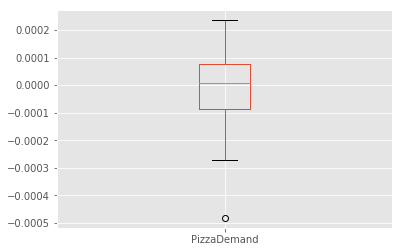

In [56]:
residuals = predictions - y_test
residuals.plot(kind='box')
plt.show()

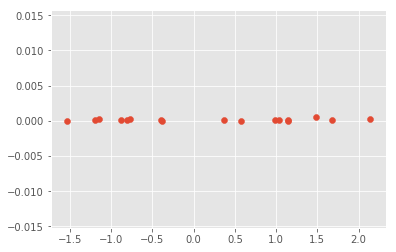

In [57]:
plt.scatter(y_test, abs(residuals))
plt.show()

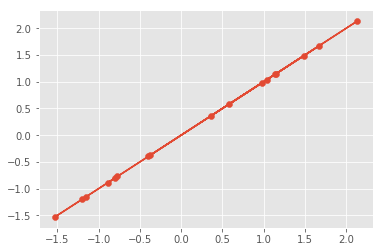

In [58]:
plt.scatter(y_test, predictions)
plt.plot(y_test, predictions)
plt.show() 

## LassoCV

In [59]:
lassocv = linear_model.LassoCV(alphas=alphas_lasso, cv=10, max_iter=100000)

In [60]:
lassocv.fit(x_train, y_train)

LassoCV(alphas=array([-1.    , -0.9798, ...,  0.9798,  1.    ]), copy_X=True,
    cv=10, eps=0.001, fit_intercept=True, max_iter=100000, n_alphas=100,
    n_jobs=1, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [61]:
predictions = lassocv.predict(x_test)

In [62]:
for i, j in zip(x_train.columns, lassocv.coef_):
    print (i, j)

PizzaPrice 0.0262048626595
BurgerPrice 1.39259488436e-18
RoomTemperature -0.0
DeliveryMode -0.0
Income 0.953296570714
softdrinkPrice -0.18854162912
Location -0.0


In [63]:
lassocv.alpha_ 

0.010101010101010166

In [64]:
np.mean((y_test - predictions)**2)**0.5 

0.020689788861823613

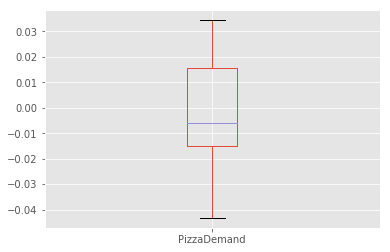

In [65]:
residuals = predictions - y_test
residuals.plot(kind='box')
plt.show()

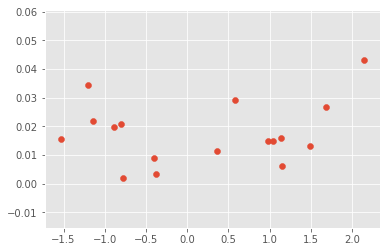

In [66]:
plt.scatter(y_test, abs(residuals))
plt.show()

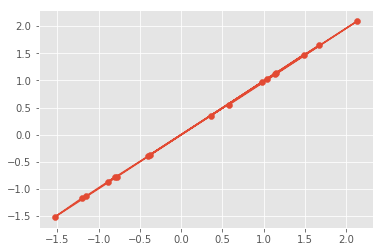

In [67]:
plt.scatter(y_test, predictions)
plt.plot(y_test, predictions)
plt.show()